# Data Preprocessing

### Setting the environment

In [154]:
import numpy as np
import pandas as pd
import csv
import warnings
warnings.filterwarnings('ignore')
import sklearn

### Dataset Description

In [155]:
description=[]

with open("AS24_Data_Description.csv", "r") as f:
    reader = csv.reader(f, delimiter=';')
  
    for row in reader:
        description.append(row) 
        
filename = "AS24_Data_Description1.csv"
    
with open(filename, 'w') as csvfile:  

    csvwriter = csv.writer(csvfile)  
 
    csvwriter.writerow(description[0])  
    csvwriter.writerows(description[1:])    

pd.set_option('display.max_colwidth', -1)
pd.read_csv('AS24_Data_Description1.csv')


,column name,description
0,article_id,unique article identifier
1,product_tier,premium status of the article
2,make_name,name of the car manufacturer
3,price,price of the article
4,first_zip_digit,first digit of the zip code of the region the article is offered in
5,first_registration_year,year of the first registration of the article
6,created_date,creation date of the listing
7,deleted_date,deletion date of the listing
8,search_views,number of times the article has been shown as a search result
9,detail_views,number of times the article has been clicked on


### Data Cleaning

In [156]:

data=[]

with open("AS24_Case_Study_Data.csv", "r") as f:
    reader = csv.reader(f, delimiter=';')
  
    for row in reader:
        
       data.append(row) 
     
                 
filename = "AS24_Case_Study_Data1.csv"
      
with open(filename, 'w') as csvfile:  

    csvwriter = csv.writer(csvfile)  
 
    csvwriter.writerow(data[0])  
    
    csvwriter.writerows(data[1:])
    
    
car_data= pd.read_csv('AS24_Case_Study_Data1.csv') #index_col='make_name'


print('number of car brands:',len(car_data["make_name"].unique()))
#car_data.info()

car_data.tail()

number of car brands: 91


,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
78316,348704581,Basic,Lexus,15740,8,2014,12.07.18,19.10.18,6895.0,230.0,99,0.03335750543872371
78317,359231940,Basic,Hyundai,2950,6,2006,28.09.18,23.10.18,1175.0,16.0,25,0.012936170212765956
78318,362425932,Basic,Volkswagen,7850,8,2014,04.11.18,21.11.18,448.0,21.0,16,0.046875
78319,357164227,Basic,Toyota,13945,5,2011,04.09.18,02.10.18,1617.0,29.0,28,0.017934446505875078
78320,353639932,Basic,Volkswagen,38800,7,2018,08.08.18,09.08.18,55.0,2.0,1,0.03454545454545454


### Displaying basic data distribution statistics

In [157]:
car_data.describe()

,article_id,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days
count,7.832100e+04,78321.000000,78321.000000,78321.000000,78311.000000,78311.000000,78321.000000
mean,3.574869e+08,15067.655316,4.632117,2011.089465,2297.502522,93.469870,35.986262
std,5.076572e+06,16374.497606,2.354275,6.538395,6339.034423,228.025588,32.214835
min,3.472324e+08,1.000000,1.000000,1924.000000,0.000000,0.000000,-3.000000
25%,3.536387e+08,5750.000000,3.000000,2008.000000,367.000000,13.000000,10.000000
50%,3.585480e+08,10900.000000,5.000000,2013.000000,920.000000,36.000000,25.000000
75%,3.614817e+08,18890.000000,7.000000,2015.000000,2234.000000,94.000000,55.000000
max,3.647040e+08,249888.000000,9.000000,2106.000000,608754.000000,13926.000000,127.000000


### Plotting number of times each product has been clicked on

In [158]:
sorted_items=car_data.groupby(['product_tier'])['detail_views'].sum()
print(sorted_items[:20] )

product_tier
Basic      6241881.0
Plus       143267.0 
Premium    934571.0 
Name: detail_views, dtype: float64


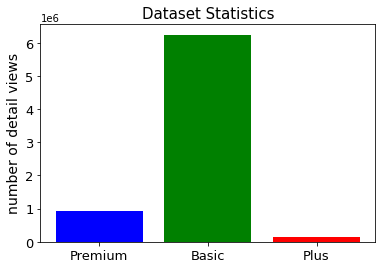

In [159]:
import matplotlib.pyplot as plt

counter_b= 6241881.0
counter_pr=934571.0
counter_pl=143267.0 

fig = plt.figure()
height = [counter_pr, counter_b, counter_pl]
bars = ('Premium', 'Basic', 'Plus')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['b', 'g', 'r'])
plt.xticks(y_pos, bars)
plt.title('Dataset Statistics', fontsize=15)
plt.ylabel('number of detail views', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#fig.set_size_inches(7, 5)
#fig.tight_layout()
#plt.savefig('sent-fig.pdf')
plt.show()

We can see that the basic products received more detail views than premium and plus.

### Check for missing data


In [160]:
car_data.isnull().values.any()

True

In [161]:
percent_missing = car_data.isnull().sum() * 100 / len(car_data)
missing_values = pd.DataFrame({'column_name': car_data.columns,
                                 'percent_missing': percent_missing})

print(missing_values)

                                     column_name  percent_missing
article_id               article_id               0.000000       
product_tier             product_tier             0.000000       
make_name                make_name                0.000000       
price                    price                    0.000000       
first_zip_digit          first_zip_digit          0.000000       
first_registration_year  first_registration_year  0.000000       
created_date             created_date             0.000000       
deleted_date             deleted_date             0.000000       
search_views             search_views             0.012768       
detail_views             detail_views             0.012768       
stock_days               stock_days               0.000000       
ctr                      ctr                      0.030643       


### Filling missing values
A simple way is to fill the missing values with mean.

In [162]:
car_data['search_views'].fillna(car_data['search_views'].mean(), inplace=True)
car_data['detail_views'].fillna(car_data['detail_views'].mean(), inplace=True)
car_data['ctr'] = pd.to_numeric(car_data['ctr'], errors='coerce')
car_data['ctr'].fillna(car_data['ctr'].mean(), inplace=True)
car_data.tail()

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
78316,348704581,Basic,Lexus,15740,8,2014,12.07.18,19.10.18,6895.0,230.0,99,0.033358
78317,359231940,Basic,Hyundai,2950,6,2006,28.09.18,23.10.18,1175.0,16.0,25,0.012936
78318,362425932,Basic,Volkswagen,7850,8,2014,04.11.18,21.11.18,448.0,21.0,16,0.046875
78319,357164227,Basic,Toyota,13945,5,2011,04.09.18,02.10.18,1617.0,29.0,28,0.017934
78320,353639932,Basic,Volkswagen,38800,7,2018,08.08.18,09.08.18,55.0,2.0,1,0.034545


In [163]:
car_data.isnull().values.any()

False

### Detail view distribution

mean(detail_views): 93.470 std(detail_views): 228.010
max(detail_views): 13926.000 min(detail_views): 0.000
median(detail_views): 36.000
Number of products never the detail has viewed:  (0.0, 1258)
Number of  products got max views:  (13926.0, 1)
Number of  products got two views (mode of the data): 1837


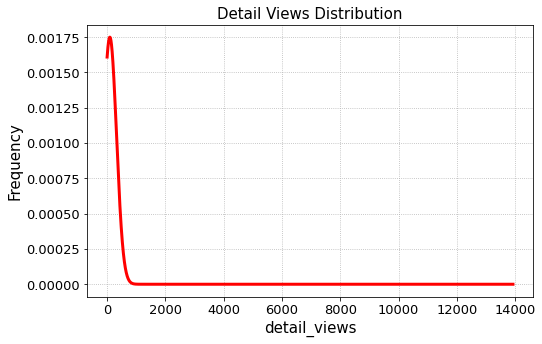

In [164]:
import scipy.stats as stats
from numpy import median
from numpy import mean
from numpy import std

vwd= car_data['detail_views'].tolist()
print('mean(detail_views): %.3f'% mean(vwd),'std(detail_views): %.3f'% std(vwd) )
print('max(detail_views): %.3f'%max(vwd),'min(detail_views): %.3f'% min(vwd) )
print('median(detail_views): %.3f'%median(vwd) )


#car_data['detail_views'].hist(bins=10,figsize=(9,6))

counter = Counter(vwd)

counter_sorted= {k: v for k, v in sorted(counter .items(), key=lambda item: item[0])}
print('Number of products never the detail has viewed: ', list( counter_sorted.items())[0])
print('Number of  products got max views: ',list( counter_sorted.items())[len(counter)-1])
print('Number of  products got two views (mode of the data):', counter.most_common(1)[0][1] )

fig, ax = plt.subplots()
ax.grid(True)
ax.grid(linestyle=':')

view= sorted(vwd)

fig.set_size_inches(8,5)
hmean=mean(vwd)
hstd = np.std(view)
pdf = stats.norm.pdf(view, hmean, hstd)

plt.plot(view, pdf, color= 'red', linewidth=3)

plt.xlabel('detail_views',fontsize=15)
plt.ylabel('Frequency',fontsize=15)#fontsize=25
plt.title('Detail Views Distribution',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

According to the distribtion chart, most of the prodcuts are viewed less than 1000 times. Highly viewed products are not occured very often in this dataset. For example, totally 1,258 products in this dataset never got a click for  detail view and 1,837 products got two clicks (mode of the data). The highest detail view (13,926 times) occured only once in this dataset.

### Check the dataset balance

In [165]:
from collections import Counter

#car_data.groupby('product_tier').count()
target_var=car_data['product_tier']

counter = Counter(target_var)
for u,v in counter.items():
    per = v / len(target_var) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (u, v, per))

Class=Basic, Count=75421, Percentage=96.297%
Class=Premium, Count=2324, Percentage=2.967%
Class=Plus, Count=576, Percentage=0.735%


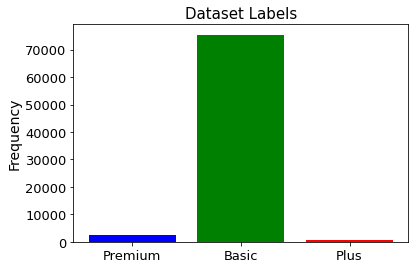

In [166]:
counter_pr=2324
counter_b= 75421
counter_pl=576

fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

height = [counter_pr, counter_b, counter_pl]
bars = ('Premium', 'Basic', 'Plus')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['b', 'g', 'r'])
plt.xticks(y_pos, bars)


plt.title('Dataset Labels', fontsize=15)

plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#fig.set_size_inches(7, 5)
#fig.tight_layout()
#plt.savefig('sent-fig.pdf')

plt.show()

We can see that the produc_tier class is imbalance. We will balance it in the next following section.

 ### Balance the dataset (undersampling)

X.shape: (78321, 8)
y.shape: (78321,)
X.shape after undersampling (5224, 8)
y.shape after undersampling (5224,)
class= 0, n= 2324 (2.9673%)
class= 1, n= 576 (0.7354%)
class= 2, n= 2324 (2.9673%)


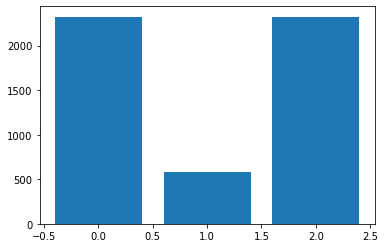

In [167]:
#from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from imblearn.under_sampling import RandomUnderSampler

# we exclude the date data

X= car_data.drop(['product_tier','make_name','created_date', 'deleted_date'], axis=1)
y=car_data['product_tier']

y = LabelEncoder().fit_transform(y)

print('X.shape:', X.shape)
print('y.shape:',y.shape)

undersample = RandomUnderSampler(sampling_strategy= {0:2324, 1:576, 2: 2324  }, random_state=1)
X_c, y_c = undersample.fit_sample(X, y)

print('X.shape after undersampling', X_c.shape)
print('y.shape after undersampling', y_c.shape)

counter = Counter(y_c)
for k,v in counter.items():
    rate = v / len(y) * 100
    print('class= %s, n= %d (%.4f%%)' % (k, v, rate))


plt.bar(counter.keys(), counter.values())
plt.show()

#class= 0, n= 75421 (96.2973%)
#class= 2, n= 2324 (2.9673%)
#class= 1, n= 576 (0.7354%)


#  Predicting Product Tier

we examine different classifiers on the dataset to quickly flush out what works well and what doesn’t:
- Dummy classifer (as baseline)
- Support Vector Machine(SVM)
- Random Forest (RF)
- k-Nearest Neighbors(KNN)
- GaussianProcessClassifier
- Multinomial Logistic Regression (LR)
- Neural Networks (NN)

##  Classifiers

In [55]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

def evaluate_model(X, y, model):
    
   cval = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
   scores = cross_val_score(model, X, y, scoring='f1_micro', cv=cval, n_jobs=-1)
   return scores

def clf_models():
    models, names = list(), list()
    
    models.append(DummyClassifier(strategy='most_frequent'))
    names.append('DuM')
    
    models.append(LinearSVC())
    names.append('SVM')
    
    models.append(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 3), random_state=42))
    names.append('NN ')
    
    models.append(LogisticRegression(solver='lbfgs', multi_class='multinomial'))
    names.append('LR ')
    
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    models.append(DecisionTreeClassifier())
    names.append('DT ')
    
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF ')
    
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET ')
    
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    return models, names

models, names = clf_models()
f_scores = list()

for i in range(len(models)):
   steps = [('o', SMOTE(k_neighbors=2)), ('m', models[i])]
   pipeline = Pipeline(steps=steps)
   scores = evaluate_model(X_c, y_c, pipeline)
   f_scores.append(scores)
   print('====> %s f_micro: %.4f (std %.4f)' % (names[i], mean(scores), std(scores)))

====> DuM f_micro: 0.4449 (std 0.0002)
====> SVM f_micro: 0.3378 (std 0.1565)
====> NN  f_micro: 0.4449 (std 0.0002)
====> LR  f_micro: 0.3972 (std 0.1789)
====> KNN f_micro: 0.5395 (std 0.0143)
====> LDA f_micro: 0.5602 (std 0.0198)
====> DT  f_micro: 0.6810 (std 0.0176)
====> RF  f_micro: 0.7783 (std 0.0131)
====> ET  f_micro: 0.7817 (std 0.0128)
====> BAG f_micro: 0.7676 (std 0.0119)


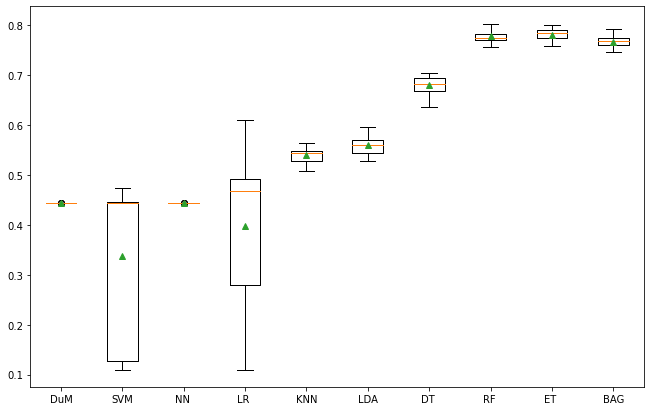

In [72]:
fig = plt.figure()
fig.set_size_inches(11, 7)
plt.boxplot(f_scores, labels=names, showmeans=True)
plt.show()

We have tried multiple classifiers. The Dummy classifier presents  the baseline of our prediction through a random guess. The performance of each method is measured by F1 score as it only returns good value if both the Precision and Recall are high and acts well in  a multi-class setting. We report the results after 5-fold cross validation along with standard deviation (std) proportional to mean.

Looking at the detail presented in the box chart, the most successful prediction  achieved by Extra Trees Classifier with F1= 0.781 and std= 0.012 (quite small). There exists a tight competition between Extra Trees (ET) and Random Forest (RF) Classifier.
ET follows ensemble learning which aggregates the results of multiple de-correlated decision trees gathered in a forest to compute the final output. 
Conceptually, ET is very similar to a Random Forest but only differs in the manner of construction of the decision trees. 
The "Random" in RF means using a random subset of the dataset, but ET instead choose the best possible threshold for each tree at each node. Overall, their  current performance is  very close, however, ET is computationally faster.  The Bagging classifier is the next successful predictor that fits multiple base classifiers (ensemble approach)  then aggregates their individual predictions.  

Although SVM and Logistic Regression are  widely used algorithms, they both fail on this dataset (worse than Dummy).
Neural networks achieved a great success in last decade, however on this particular dataset the feedforward network showed a poor performance using implementations from both sklearn and Keras.

We conclude  ensemble learning methods which aggregate multiple classifiers are well-suited for this dataset.

### Neural Networks (Keras)

In [60]:
from sklearn.model_selection  import train_test_split
from keras.models import Sequential
from keras.layers import Dense


y_k = LabelBinarizer().fit_transform(y_c)
X_train, X_test, y_train, y_test  = train_test_split(X_c, y_k, test_size=0.3, random_state=42)

def neural_net(X_train, y_train, Xtest, ytest):
    
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    model.fit(X_train, y_train, validation_split=0.3, epochs=20,batch_size=32, verbose=0)
    loss, accuracy= model.evaluate(X_test, y_test)
    return accuracy

accuracy= neural_net(X_train, y_train, X_test, y_test)
print( 'Accuracy:', accuracy)

1568/1568 [==============================] - 0s 94us/step
Accuracy: 0.626700758934021


# Approximating Detail Views

we use the following regressors:
-  Dummy (as baseline)
-  LinearRegression
-  HuberRegressor
-  RANSACRegressor
-  DecisionTreeRegressor
-  BaggingRegressor
-  GradientBoostingRegressor
-  RandomForestRegressor

In [61]:
X_reg= car_data.drop(['detail_views','make_name', 'product_tier','created_date', 'deleted_date'], axis=1)
y_reg=car_data['detail_views'] 

mean(detail_views): 93.470 std(detail_views): 228.010
max(detail_views): 13926.000 min(detail_views) 0.000
=====> Dum    mean absolute error: 95.589  (std: 1.587)
=====> Linear mean absolute error: 43.329  (std: 0.545)
=====> Huber  mean absolute error: 78.856  (std: 2.038)
=====> RANSAC mean absolute error: 36.687  (std: 2.130)
=====> BAG    mean absolute error: 3.138  (std: 0.457)
=====> DT     mean absolute error: 4.612  (std: 0.517)
=====> RF     mean absolute error: 2.703  (std: 0.427)
=====> GBoost mean absolute error: 8.058  (std: 0.899)


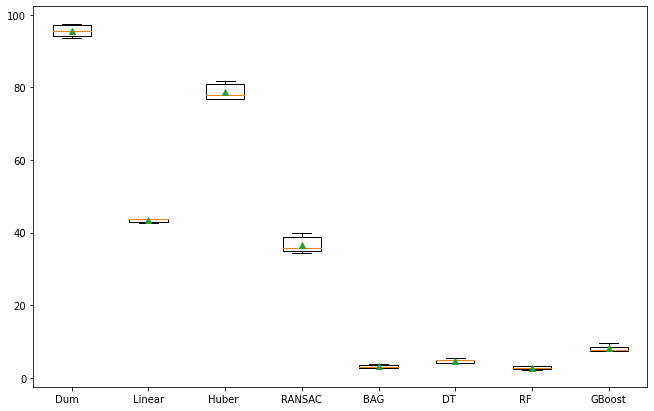

In [119]:
import numpy as np
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble  import GradientBoostingRegressor
from sklearn.ensemble  import StackingRegressor
from sklearn.ensemble  import RandomForestRegressor
from sklearn.dummy import DummyRegressor


def reg_models():
    
   models = dict()
   models['Dum   ']=  DummyRegressor()
   models['Linear'] = LinearRegression()
   models['Huber '] = HuberRegressor()
   models['RANSAC'] = RANSACRegressor()
   models['BAG   '] = BaggingRegressor()
   models['DT    '] = DecisionTreeRegressor()
   models['RF    '] = RandomForestRegressor()
   models['GBoost'] = GradientBoostingRegressor()
  
   return models
 

def evalute_model(X, y, model, name):

   cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
   scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', n_jobs=-1)
   scores = absolute(scores)
   return scores

print('mean(detail_views): %0.3f'%mean(y_reg),'std(detail_views): %0.3f'% std(y_reg) )
print('max(detail_views): %0.3f'% max(y_reg),'min(detail_views) %0.3f'% min(y_reg) ) 


models_reg = reg_models()
results_reg = dict()
for name_reg, model_reg in models_reg.items():

   results_reg[name_reg] = evalute_model(X_reg, y_reg, model_reg, name_reg)
   print('=====> %s mean absolute error: %.3f  (std: %.3f)' % (name_reg, mean(results_reg[name_reg]), std(results_reg[name_reg])))

fig = plt.figure()
fig.set_size_inches(11, 7)    
plt.boxplot(results_reg.values(), labels=results_reg.keys(), showmeans=True)
plt.show()

We report our results by Mean Absolute Error (MAE) which is most natural measure of average error magnitude. The lower error, the better approximation. Looking at MAEs and the box chart, the most successful gain comes from the ensemble models like Random Forest and Bagging Regressor. This result was expected as the nature of the dataset  remains mostly similar to  classification case. RF approximates the detail views very well with the average error of 2.7 and a small std of 0.42. Given the mean of the data (93.4) and  standard deviation (228.0) , RF with small std error (0.42) can approximate the large number clicks quite well. However, approximating the detail views for items with 0, 1, 2 or 3 clicks is still challenging. 


# Additional Experiments
We examine whether the date columns make a difference in classification results:

====> DuM f_micro: 0.4449 (std 0.0002)
====> SVM f_micro: 0.3808 (std 0.1721)
====> NN  f_micro: 0.4449 (std 0.0002)
====> LR  f_micro: 0.4026 (std 0.1469)
====> KNN f_micro: 0.5416 (std 0.0149)
====> LDA f_micro: 0.5535 (std 0.0214)
====> DT  f_micro: 0.6875 (std 0.0185)
====> RF  f_micro: 0.7858 (std 0.0130)
====> ET  f_micro: 0.7854 (std 0.0109)
====> BAG f_micro: 0.7762 (std 0.0127)


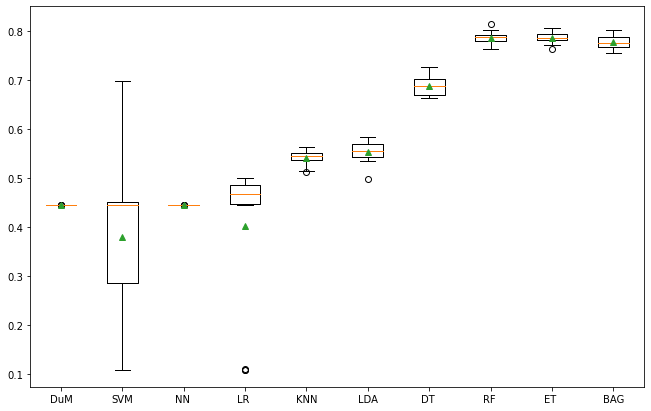

In [75]:
car_data['created_date'] = pd.to_datetime(car_data['created_date'], errors = 'coerce')
car_data['deleted_date'] = pd.to_datetime(car_data['deleted_date'],  errors = 'coerce')


car_data['created_year'] = car_data['created_date'].dt.year
car_data['created_month'] = car_data['created_date'].dt.month
car_data['created_day'] = car_data['created_date'].dt.day


car_data['deleted_year'] = car_data['deleted_date'].dt.year
car_data['deleted_month'] = car_data['deleted_date'].dt.month
car_data['deleted_day'] = car_data['deleted_date'].dt.day

X_add= car_data.drop(['product_tier','make_name','created_date', 'deleted_date'], axis=1)
y_add=car_data['product_tier']
y_add = LabelEncoder().fit_transform(y_add)

undersample = RandomUnderSampler(sampling_strategy= {0:2324, 1:576, 2: 2324  }, random_state=1)
X_t, y_t = undersample.fit_sample(X_add, y_add)

models, names = clf_models()

f_scores = list()

for i in range(len(models)):
   steps = [('o', SMOTE(k_neighbors=2)), ('m', models[i])]
   pipeline = Pipeline(steps=steps)
   
   scores = evaluate_model(X_t, y_t, pipeline)
   f_scores.append(scores)
   print('====> %s f_micro: %.4f (std %.4f)' % (names[i], mean(scores), std(scores)))

fig = plt.figure()
fig.set_size_inches(11, 7)
plt.boxplot(f_scores, labels=names, showmeans=True)
plt.show()


We can see that including time columns does not make a significant difference, yet ensemble learning methods (ET, RF, BAG) are sucessful in this prediction task.